

# Project: Analyzing TMDB movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> **Questions**: In this project, we find top 10 movies based on profit and rating and, secondly, what are the properties associated with high revenue movies?  

> **Information about the dataset**: Here we investigate the movies data based on 10000 movies using NumPy and Pandas. For each movie, the dataset includes information on aspects such as popularity, budget, revenue, cast, directors, production house, date of release, runtime, and its rating.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('tmdb-movies.csv')

%matplotlib inline

In [3]:
data.shape

(10866, 21)

**Data**: There are 10866 instances with 21 columns. 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Here, we are looking at the general properties of the dataset. 

In [4]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Looking at the types of data and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Missing values**

Looks like there are some missing values.
I decided to drop 5 columns as they contained a lot of missing values and were not relevant to the questions. 


In [6]:
# Drop colums with a lot of missing variables
data.drop(columns=['homepage','tagline','keywords','imdb_id','overview'],inplace=True)

# Check number of missing rows after removing those columns
data.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Eliminate missing rows
data.dropna(axis=0,inplace=True)
data.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


We have 9773 samples of movies after removing rows containing missing values. 

Dealing with zero values: For the variables such as 'budget' and 'revenue', there are some cells with zero values that are due to errors. So, I replaced 
them with NaN. 

In [9]:
0 in data['budget'].values

True

In [58]:
0 in data['revenue'].values

True

In [10]:
data['budget'].eq(0).sum()

4751

For more than half of the movies, zero values were recorded for the budget column. 

In [11]:
data['revenue'].eq(0).sum()

5022

For more than half of the movies, zero values were recorded for the revenue column. 

Removing these zero values are equivalent to missing a lot of information. So, I decided to replace them with NaNs and keep them. 

In [13]:
data['budget']=data['budget'].replace(0,np.NaN)
data['revenue']=data['revenue'].replace(0,np.NaN)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
budget                  5022 non-null float64
revenue                 4751 non-null float64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 1.3+ MB


Changing the format of release_date to day_time format

In [15]:
data['release_date']=pd.to_datetime(data['release_date'])
data.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Check for duplicated values and drop duplicates

In [16]:
# Check duplicated values
data.duplicated().sum()
# This shows only 1 duplicate and we now delete the duplicate 
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [17]:
# Dealing with zero values under budget and revenue--- let's see how many cells have zero values?
print(data[data['budget']==0].shape[0],data[data['revenue']==0].shape[0])

0 0


In [18]:
# Final shape of data
data.shape

(9772, 16)

After the data cleaning step, there are 9772 samples of data. 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 


**Question 1** What are the top 10 movies of all time based on the highest profit achieved and average rating? Are there any common movies in top 10 lists based on both profit and average rating?

In [62]:
# Here we calculate the profit by subtracting budget from revenue. 
data['profit']=data['revenue']-data['budget']
data['profit']

0        1.363529e+09
1        2.284364e+08
2        1.852382e+08
3        1.868178e+09
4        1.316249e+09
             ...     
10861             NaN
10862             NaN
10863             NaN
10864             NaN
10865             NaN
Name: profit, Length: 9772, dtype: float64

In [21]:
print('The movie with minimum profit is',data.loc[data['profit'].idxmin()]['original_title'],'.The movie with maximum profit is',data.loc[data['profit'].idxmax()]['original_title'])

The movie with minimum profit is The Warrior's Way .The movie with maximum profit is Avatar


Findings: The movie with maximum profit is Avator and the movie with minimum profit is Warrier's way. 
Below is the plot of top 10 movies based on highest profit. We use the seaborn library which provides an appropriate visualization for our need. 

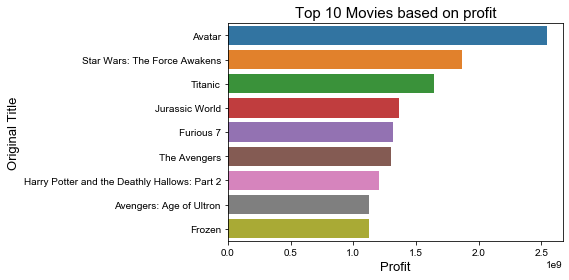

In [22]:
ax = sns.barplot(x=data.sort_values(by=['profit'],ascending=False)['profit'][0:9],y=data.sort_values(by=['profit'],ascending=False)['original_title'][0:9])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Movies based on profit",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
ax.set_ylabel("Original Title",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

In [63]:
# highest and lowest vote counts
min_vote=data.loc[data['vote_average'].idxmin()]['original_title']
max_vote=data.loc[data['vote_average'].idxmax()]['original_title']
print('The movie with minimum average rating is '+min_vote+'. The movie with maximum average rating is '+max_vote)

The movie with minimum average rating is Transmorphers. The movie with maximum average rating is Pink Floyd: Pulse


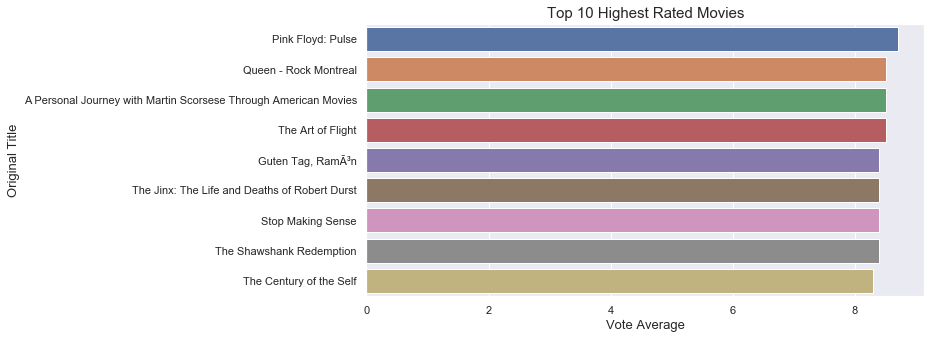

In [24]:
# Top 10 highest rated movies
ax = sns.barplot(x=data.sort_values(by=['vote_average'],ascending=False)['vote_average'][0:9],y=data.sort_values(by=['vote_average'],ascending=False)['original_title'][0:9])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
ax.set_ylabel("Original Title",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

Findings: There is no movie in common in top 10 lists based on rating and profit.  

### Reseach Question 2


**Question 2** What kinds of properties are associated with movies that have high revenues?

In [64]:
# Print top 10 directors based on highest revenue
director_by_revenue=data.groupby('director').mean()['revenue'].sort_values(ascending=False)
director_by_revenue[:19]

director
Chris Buck|Jennifer Lee                      1.274219e+09
Kyle Balda|Pierre Coffin                     1.156731e+09
Irwin Winkler                                1.106280e+09
Lee Unkrich                                  1.063172e+09
David Yates                                  1.038574e+09
Joss Whedon                                  9.878210e+08
Andrew Adamson|Kelly Asbury|Conrad Vernon    9.198388e+08
Steve Martino|Mike Thurmeier                 8.772448e+08
Andrew Stanton|Lee Unkrich                   8.646260e+08
Pete Docter                                  8.537086e+08
Chris Miller|Raman Hui                       7.989582e+08
Roger Allers|Rob Minkoff                     7.882418e+08
Colin Trevorrow                              7.587683e+08
Robert Stromberg                             7.584104e+08
Pierre Coffin|Chris Renaud                   7.571379e+08
Eric Darnell|Tom McGrath|Conrad Vernon       7.469213e+08
Dan Scanlon                                  7.435596e+08
Bob P

Text(0, 0.5, 'revenue')

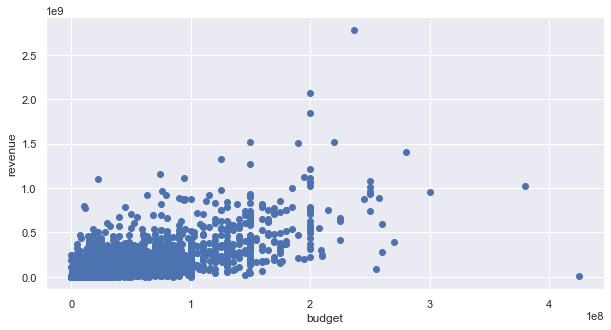

In [49]:
# Does revenue relate to budget?
fig=plt.figure()
plt.scatter(data['budget'],data['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')

It looks like there is a positive relationship between budget and revenue. More money to invest can lead to a higher revenue. 

Text(0, 0.5, 'revenue')

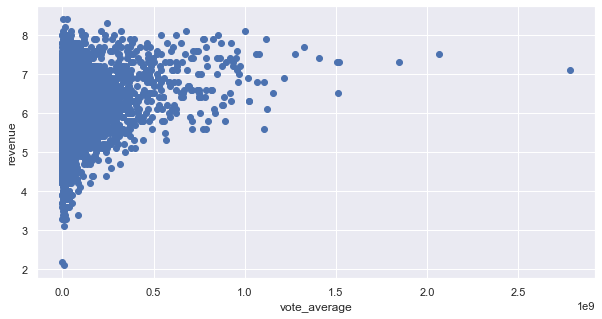

In [51]:
# Does revenue relate to average rating?
fig=plt.figure()
plt.scatter(data['revenue'],data['vote_average'])
plt.xlabel('vote_average')
plt.ylabel('revenue')

There appears to be a positive relationship between revenue and average rating despite being a non-linear one. 

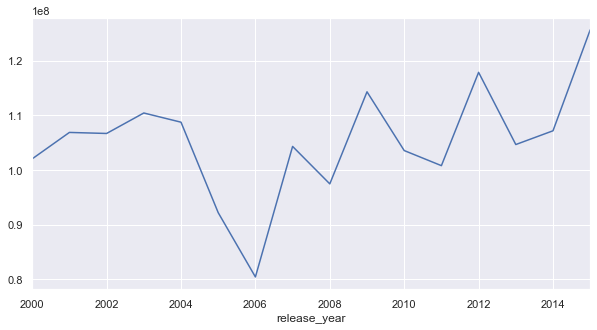

In [61]:
# How does revenue change with the release year since 2000?
data.groupby('release_year').mean()['revenue'][-16:].plot()

There appears to be almost a steady increase in the amount of revenue since 2000 except a downfall in 2006. 

### Limitations:
The main limitation I encountered while doing this project was a large number of samples with zero revenue and budget. Excluding them leads to losing more than half of our data. So I kept these samples and replaced them with NaNs in order to not account them in my calculations. In addition, there were some attributes with a large number of missing data and excluding associated rows leads to losing many data samples. Instead, I excluded the columns with a lot of missing data that were not relevant to the questions I asked. 

<a id='conclusions'></a>
## Conclusions


I computed the top 10 movies based on profit and average rating and found no movies in common in both top 10 lists. Among the top 10 movies listed, Avator has the highest profit and Pink Floyed has the highest average rating. Secondly, I explored how movie revenues related to various factors. Director Chris Buck|Jennifer Lee has achieved the highest revenue among other directors. Without statistical testing, I cannot confirm the presence or absence of relationships. However, revenue seems to be linked to budget and vote_average and has undergone a steady increase since 2000. 